In [ ]:
#importing dependencies
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # for using Linear regression
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("TSLA.csv") # loading the dataset and converting it to dataframe using pandas

In [ ]:
data.head() # viewing first 5 rows of all the coulmns of the dataframe


,Date,Open,Previous Day High,Previous Day Low,Close,Adj Close,Previous Day Volume
0,30-06-2010,5.158,6.084,4.660,4.766,4.766,85935500
1,01-07-2010,5.000,5.184,4.054,4.392,4.392,41094000
2,02-07-2010,4.600,4.620,3.742,3.840,3.840,25699000
3,06-07-2010,4.000,4.000,3.166,3.222,3.222,34334500
4,07-07-2010,3.280,3.326,2.996,3.160,3.160,34608500


In [ ]:
# Open tells us about the opening price of the stock on current day
# Previous Day High gives us the highest value of the stock on previous day 
# Previous Day Low gives us the lowest value of the stock on previous day
# Close gives us the closing value of the stock on current day
# Adjusted Close gives the data of adjusted closing price of the stock on the current day. (Adjusted closing price can be understood as the price of the stock after market closes, incase there is 
# some corporate action such as some major fraud in the company or some action by the government on the company, the stock holders might suffer because stock values would drastically fall down on the next day, so
# to prevent that CLosd price is adjusted such that stock holders won't suffer much. In case there is no such incident, it remains same as the closing price.) 
# Previous Day volume gives the data of volume of stocks sold on the previous day

In [ ]:
data.info() # checking if there are any missing values (NaN)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579 entries, 0 to 2578
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 2579 non-null   object 
 1   Open                 2579 non-null   float64
 2   Previous Day High    2579 non-null   float64
 3   Previous Day Low     2579 non-null   float64
 4   Close                2579 non-null   float64
 5   Adj Close            2579 non-null   float64
 6   Previous Day Volume  2579 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 141.2+ KB


In [ ]:
data.describe() # basic description of dataframe

,Open,Previous Day High,Previous Day Low,Close,Adj Close,Previous Day Volume
count,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2.579000e+03
mean,49.206686,50.301806,48.073117,49.253279,49.253279,3.078217e+07
std,57.934102,59.888383,55.852349,58.119783,58.119783,2.855717e+07
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,7.159000,7.268000,6.989000,7.153000,7.153000,1.047400e+07
50%,44.001999,44.660000,43.301998,43.924000,43.924000,2.413100e+07
75%,59.339000,60.171000,57.841000,59.020001,59.020001,3.979150e+07
max,502.140015,502.489990,470.510010,498.320007,498.320007,3.046940e+08


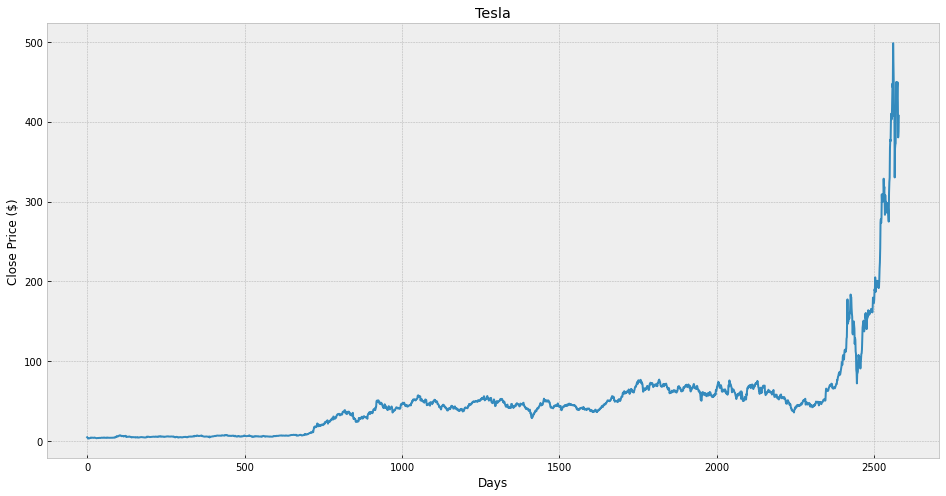

In [ ]:
#Plotting closing price of stocks v/s days (We have data of 1 stock on each day)
plt.figure(figsize=(16,8))
plt.title('Tesla')
plt.xlabel('Days')
plt.ylabel('Close Price ($)')
plt.plot(data['Close'])
plt.style.use('bmh')
plt.show() 

In [ ]:
X = data[['Previous Day High','Previous Day Low','Open','Previous Day Volume']].values # preparing feature dataset including columns necessary for the same, not including Date and Adjusted Close Values
y = data['Close'].values # preparing target dataset

In [ ]:

X

array([[6.08400000e+00, 4.66000000e+00, 5.15800000e+00, 8.59355000e+07],
       [5.18400000e+00, 4.05400000e+00, 5.00000000e+00, 4.10940000e+07],
       [4.62000000e+00, 3.74200000e+00, 4.60000000e+00, 2.56990000e+07],
       ...,
       [4.12149994e+02, 3.75880005e+02, 4.05160004e+02, 9.50742000e+07],
       [3.99500000e+02, 3.51299988e+02, 3.63799988e+02, 9.65611000e+07],
       [4.08730011e+02, 3.91299988e+02, 3.93470001e+02, 6.70684000e+07]])

In [ ]:
y

array([  4.766   ,   4.392   ,   3.84    , ..., 380.359985, 387.790009,
       407.339996])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1) # Splitting it into training and testing dataset


In [ ]:
# description of number of rows and columns of the training and testing dataset
print(X_train.shape) 
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1805, 4)
(1805,)
(774, 4)
(774,)


In [ ]:
regressor = LinearRegression() # Using Linear Regression to train the model first and then test it

In [ ]:
regressor.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(regressor.coef_)


[ 8.87095614e-01  5.85513083e-01 -4.76088446e-01 -1.00579989e-08]


In [ ]:
print(regressor.intercept_)

0.21562506903292444


In [ ]:
predicted = regressor.predict(X_test) # using it for testing dataset

In [ ]:
print(predicted)
print()
print(predicted.shape)

[ 48.28710377   5.46796474  67.81519558   6.68986368  50.57475389
  50.15802018  41.85593245  24.42517644  49.54803051  43.90230937
 298.79298492  37.51402063   7.85499938  43.74164349  54.54668473
   4.86374123  43.0577183   62.23745654   6.62671137  50.86453905
 162.17778438  54.01208146  26.89490796  17.34867615  67.53108095
  45.30737392  72.83821008  49.06133251 143.27239733  51.92928264
  50.70256477  29.52666431  49.57760379  47.45345367  32.76661722
 155.0533991   62.70618124   4.36559773  43.69638043  27.58513271
  58.69012648  38.24953676  38.95889793  38.59116288  23.66760729
  39.00734264   3.45184405  40.98080408   8.01183053  52.44962283
   3.97031792   5.74775758   3.01063992  42.26288089  33.17485593
   7.30407959   7.21164417  49.53701516 449.58142711   8.24903154
 130.87602639  47.09386717  70.10875987  41.83007477  43.81371492
  55.29270419 126.86476192  64.01792297  48.65801982  67.90733784
   5.13970989  58.15189852  39.66296044  41.28471972   6.80734248
  37.21190

In [ ]:
data1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted' : predicted.flatten()})

In [ ]:
print(data1.shape)
data1.head(20)


(774, 2)


,Actual,Predicted
0,48.598000,48.287104
1,5.348000,5.467965
2,68.570000,67.815196
3,6.430000,6.689864
4,49.812000,50.574754
5,50.004002,50.158020
6,41.400002,41.855932
7,24.690001,24.425176
8,49.785999,49.548031
9,43.472000,43.902309


Text(0.5, 1.0, 'Using Linear Regression')

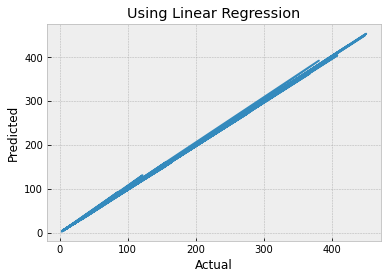

In [ ]:
# Plottiing regression line 
plt.plot(data1['Actual'],data1['Predicted'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Using Linear Regression')

In [ ]:
# calculating values of various performance measures
mae_1 = metrics.mean_absolute_error(y_test, predicted) # mean absolute error; Represents average absolute error between the actual and predicted values
mse_1 = metrics.mean_squared_error(y_test, predicted) # mean squared error; MSE is used to check how close estimates or forecasts are to actual values. 
rmse_1 = np.sqrt(mse_1) # or mse**(0.5)  # root mean square error; how concentrated the data is around the line of best fit.
r2_1 = metrics.r2_score(y_test, predicted) #r squared = statistical measure of how close the data are to the fitted regression line

print(mae_1)
print(mse_1)
print(rmse_1)
print(r2_1)
print()

0.46916068356268553
0.9033937318869565
0.9504702688074764
0.9996861814199335



In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree= DecisionTreeRegressor().fit(X_train,y_train)

In [ ]:
predicted = regressor.predict(X_test)

In [ ]:
data2 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted' : predicted.flatten()})
print(data2.shape[0])
data2.head(20)


774


,Actual,Predicted
0,48.598000,48.287104
1,5.348000,5.467965
2,68.570000,67.815196
3,6.430000,6.689864
4,49.812000,50.574754
5,50.004002,50.158020
6,41.400002,41.855932
7,24.690001,24.425176
8,49.785999,49.548031
9,43.472000,43.902309


Text(0.5, 1.0, 'Using Decision Tree Regression')

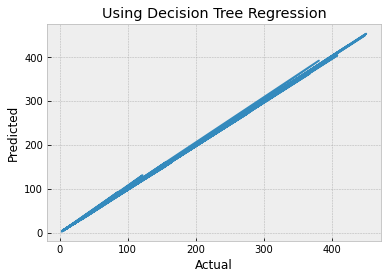

In [ ]:
plt.plot(data2['Actual'],data2['Predicted'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Using Decision Tree Regression')

In [ ]:
mae_2 = metrics.mean_absolute_error(y_test, predicted)
mse_2 = metrics.mean_squared_error(y_test, predicted)
rmse_2 = np.sqrt(mse_2) # or mse**(0.5)  
r2_2 = metrics.r2_score(y_test, predicted)

In [ ]:
mae_2

0.46916068356268553

In [ ]:
mse_2

0.9033937318869565

In [ ]:
rmse_2

0.9504702688074764

In [ ]:
r2_2

0.9996861814199335

In [ ]:
tree.score(X_test,y_test)

0.9980136100671083

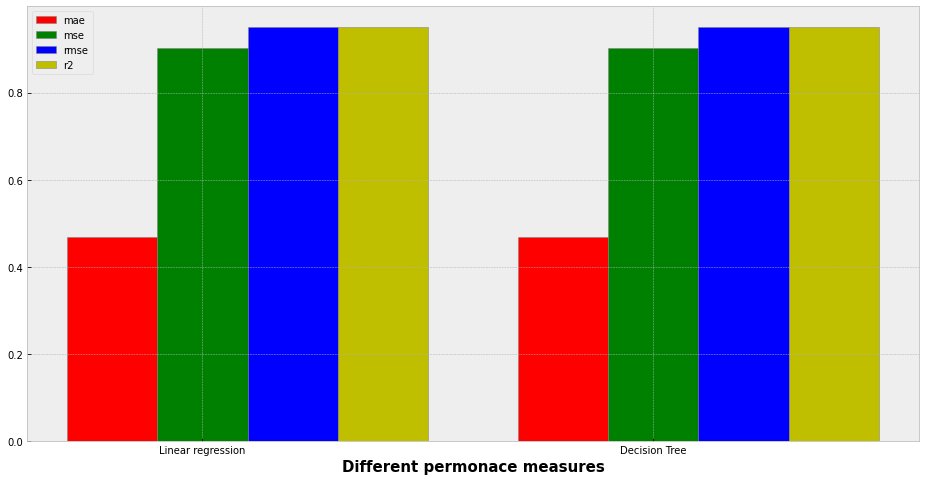

In [ ]:
#plotting bar graphs for different values of all the performance metrics considered above to give idea which model is best suited for our problem statement
# set width of bar
barWidth = 0.20
fig = plt.subplots(figsize =(16, 8))
 
# set height of bar
mae = [mae_1,mae_2]
mse = [mse_1,mse_2]
rmse = [rmse_1,rmse_2]
r2 = [r2_1,r2_2]
 
# Set position of bar on X axis
br1 = np.arange(len(mae))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
 
# Make the plot
plt.bar(br1, mae, color ='r', width = barWidth,
        edgecolor ='grey', label ='mae')
plt.bar(br2, mse, color ='g', width = barWidth,
        edgecolor ='grey', label ='mse')
plt.bar(br3, rmse, color ='b', width = barWidth,
        edgecolor ='grey', label ='rmse')
plt.bar(br4,rmse, color='y',width = barWidth,
        edgecolor = 'grey', label='r2' )
 
# Adding Xticks
plt.xlabel('Different permonace measures', fontweight ='bold', fontsize = 15)
# plt.ylabel('Percentage', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(mae))],
        ['Linear regression','Decision Tree'])
 
plt.legend()
plt.show()

In [ ]:
# Conclusion : Both Linear regression and Decision Tree Regression produces the same results and the values predicted are very close to actual values, so any of these algorithms can be used for prediction using regression